In [2]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

Using TensorFlow backend.


In [3]:
from keras.utils import np_utils
from keras.utils import to_categorical

In [4]:
from keras import models
from keras import layers
from keras import regularizers
from keras.layers import Dropout

In [5]:
# conv
from keras import layers
from keras import models
from keras.layers.convolutional import Conv2D
from keras.layers import Dense
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten

import os, shutil

In [6]:
original_dataset_dir = 'Downloads/dogs-vs-cats/train1' # uncompressed data stored
base_dir = 'Downloads/cats_and_dogs_small'   # will be substitued to train, test, validation in this directory
# os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)


train_cats_dir = os.path.join(train_dir, 'cats')
# os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
# os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
# os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
# os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
# os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
# os.mkdir(test_dogs_dir)



In [7]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)  # copy from original to train
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    

fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)



In [8]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)



In [9]:
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr = 1e-4), metrics = ['acc'])

NameError: name 'model' is not defined

In [10]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr = 1e-4), metrics = ['acc'])



train_datagen = ImageDataGenerator(rescale = 1./255,    # data transformation leading to more images
                                  rotation_range = 40,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                                  )

test_datagen = ImageDataGenerator(rescale = 1./255)


train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size = (150, 150),
                                                   batch_size = 32,
                                                   class_mode = 'binary')


validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size = (150, 150),
                                                       batch_size = 32,
                                                       class_mode = 'binary')





history = model.fit_generator(train_generator,
                             steps_per_epoch = 5,
                             epochs = 2,
                             validation_data = validation_generator,
                             validation_steps = 50)


model.save('cats_and_dogs_small_2.h5')


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/2
5/5 [==============================] - 30s 6s/step - loss: 0.7014 - acc: 0.5125 - val_loss: 0.7086 - val_acc: 0.4968
Epoch 2/2
5/5 [==============================] - 25s 5s/step - loss: 0.6961 - acc: 0.5188 - val_loss: 0.6908 - val_acc: 0.5677


In [1]:
conda clean -tipsy

    Use 'conda build purge-all' to remove source cache files.
Cache location: /Users/syem/anaconda3/pkgs
Will remove the following tarballs:

/Users/syem/anaconda3/pkgs
--------------------------
clang_osx-64-4.0.1-h1ce6c1d_17.tar.bz2       145 KB
clangxx-4.0.1-1.tar.bz2                      263 KB
openssl-1.1.1b-h1de35cc_1.tar.bz2            3.5 MB
pystan-2.17.1.0-py37h051e8ed_1004.tar.bz2    14.2 MB
conda-4.7.12-py37_0.tar.bz2                  3.0 MB
lunardate-0.2.0-py_0.tar.bz2                  21 KB
convertdate-2.2.1-pyh9f0ad1d_0.tar.bz2        33 KB
ipython-7.4.0-py37h39e3cac_0.tar.bz2         1.1 MB
compiler-rt-4.0.1-hcfea43d_1.tar.bz2         1.2 MB
clangxx_osx-64-4.0.1-h22b1bf0_17.tar.bz2     146 KB
llvm-4.0.1-1.tar.bz2                       136.6 MB
python_abi-3.7-1_cp37m.tar.bz2                 4 KB
llvm-lto-tapi-4.0.1-1.tar.bz2               11.9 MB
cctools-895-1.tar.bz2                        1.9 MB
clang-4.0.1-1.tar.bz2                       73.9 MB
holidays-0.10.2-pyh9f0a

In [11]:
from keras.applications import VGG16

# pretrained convet

conv_base = VGG16(weights = 'imagenet',
                 include_top = False,
                 input_shape = (150, 150, 3))


In [12]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = 'Downloads/cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale = 1./255)

batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape= (sample_count, 4, 4, 512))  # zeros will be filled with values extracted
    labels = np.zeros(shape = (sample_count))
    generator = datagen.flow_from_directory(directory,
                                           target_size = (150, 150),      # data augmentation not used, no new data
                                           batch_size = batch_size,
                                           class_mode = 'binary')
    
    i = 0
    
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i+1) * batch_size] = features_batch # fill zeros with values
        labels[i * batch_size: (i+1) * batch_size] = labels_batch
        
        i += 1
        
        if i * batch_size >= sample_count:
            break
            
    return features, labels
        
train_features, train_labels = extract_features(train_dir, 2000) # 2000 training, sample count
validation_features, validation_labels = extract_features(validation_dir, 1000) # validation 1000
test_features, test_labels = extract_features(test_dir, 1000) # testing 1000





Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
# flatten the data in (4,4,512) image data form before feeding it to dense layer
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))


In [14]:
from keras import models
from keras import layers
from keras import optimizers

model = Sequential()
model.add(Dense(256, activation = 'relu', input_dim = 4 * 4 * 512))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = optimizers.RMSprop(lr = 2e-5), loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(train_features, train_labels, epochs = 30, batch_size = 20, 
                    validation_data = (validation_features, validation_labels), )




Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.5806 - acc: 0.6905 - val_loss: 0.4248 - val_acc: 0.8590
Epoch 2/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.4216 - acc: 0.8130 - val_loss: 0.3536 - val_acc: 0.8710
Epoch 3/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.3564 - acc: 0.8435 - val_loss: 0.3251 - val_acc: 0.8730
Epoch 4/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.3112 - acc: 0.8710 - val_loss: 0.2937 - val_acc: 0.8910
Epoch 5/30
2000/2000 [==============================] - 3s 1ms/step - loss: 0.2958 - acc: 0.8785 - val_loss: 0.2790 - val_acc: 0.8970
Epoch 6/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.2638 - acc: 0.8960 - val_loss: 0.2773 - val_acc: 0.8960
Epoch 7/30
2000/2000 [==============================] - 3s 2ms/step - loss: 0.2462 - acc: 0.9015 - val_loss: 0.2593 - val_acc: 0.9000
Epoch 8/30
200

<Figure size 432x288 with 0 Axes>

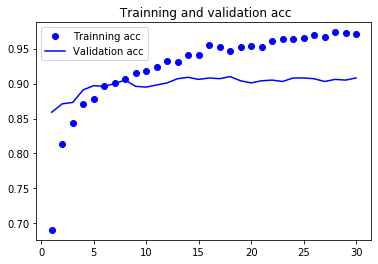

<Figure size 432x288 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label = 'Trainning acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title(' Trainning and validation acc')
plt.legend()
plt.figure()


In [16]:
# convnet model
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [17]:
# freeze the layer so that weights arent updated during training, due to large number of parameters
print('Trainable weights before freezing:', len(model.trainable_weights))
conv_base.trainable = False
print('Trainable weights after freezing', len(model.trainable_weights))


Trainable weights before freezing: 30
Trainable weights after freezing 4


In [18]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

train_dataget = ImageDataGenerator(rescale = 1./255,     # data augmentation, transformin image leads to more data,
                                            # no specific values, randomly applied to transform, reduce overfitting
                                  rotation_range = 40,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True,
                                  fill_mode = 'nearest')

test_datagen = ImageDataGenerator(rescale = 1./255)



train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size = (150, 150), # resize image to 150 X 150
                                                   batch_size = 20,
                                                   class_mode = 'binary')


validation_generator = test_datagen.flow_from_directory(validation_dir, target_size = (150, 150),
                                                       batch_size = 20,
                                                       class_mode = 'binary')


model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr = 2e-5),
             metrics = ['accuracy'])


history = model.fit_generator(train_generator,
                             steps_per_epoch = 5,
                             epochs = 2,
                             validation_data = validation_generator,
                             validation_steps = 2)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/2
5/5 [==============================] - 27s 5s/step - loss: 0.7068 - accuracy: 0.5000 - val_loss: 0.8315 - val_accuracy: 0.4500
Epoch 2/2
5/5 [==============================] - 25s 5s/step - loss: 0.6859 - accuracy: 0.5400 - val_loss: 0.6606 - val_accuracy: 0.6000


In [19]:
conv_base.trainable = True
set_trainable = False   #  Freeze upto a specific block
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True   # set True for block 5
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

# lower learning rate, large learning rate mean more updates which can harm the system
# overide previous information learned and include for error, more parameters(more parameters = more memorizing = overfit)
        
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.RMSprop(lr = 1e-5), metrics = ['acc']) #
history = model.fit_generator(train_generator, steps_per_epoch = 5, epochs = 2, validation_data = validation_generator,
                             validation_steps = 5)



Epoch 1/2
5/5 [==============================] - 38s 8s/step - loss: 0.6541 - acc: 0.6600 - val_loss: 0.5525 - val_acc: 0.7100
Epoch 2/2
5/5 [==============================] - 37s 7s/step - loss: 0.6018 - acc: 0.6600 - val_loss: 0.6407 - val_acc: 0.7200


<Figure size 432x288 with 0 Axes>

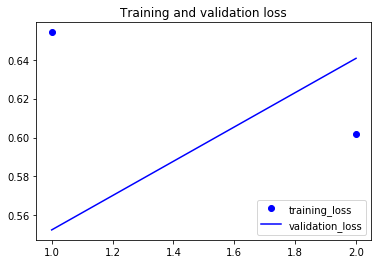

<Figure size 432x288 with 0 Axes>

In [20]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'bo', label = 'training_loss')
plt.plot(epochs, val_loss, 'b', label = 'validation_loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

In [21]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                 target_size = (150, 150), # reshape to size
                                                 batch_size = 20,
                                                 class_mode = 'binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps = 5)
print('test acc:', test_acc)



Found 1000 images belonging to 2 classes.
test acc: 0.7099999785423279


In [22]:
from keras.models import load_model
model = load_model('cats_and_dogs_small_2.h5')



In [23]:
img_path =  'Downloads/cats_and_dogs_small/test/cats/cat.1700.jpg'


In [24]:
from keras.preprocessing import image  # preprocess image into 4D tensor
import numpy as np

img = image.load_img(img_path, target_size = (150, 150)) # reshape to 150x150

img_tensor = image.img_to_array(img) # convert array which is a tensor
img_tensor = np.expand_dims(img_tensor, axis = 0) # expand shape of array (150, 150, 3) --> (1, 150, 150, 3), 3D->4D
img_tensor /= 255 # preprocessed/normalized
print(img_tensor.shape)


(1, 150, 150, 3)


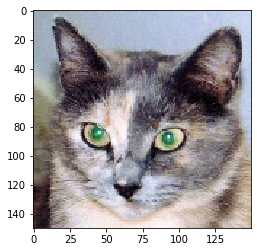

In [25]:
plt.imshow(img_tensor[0])
plt.show()


In [26]:
from keras import models
# extract output from top 8 layer
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs = model.input, outputs = layer_outputs) # model that returns output given input


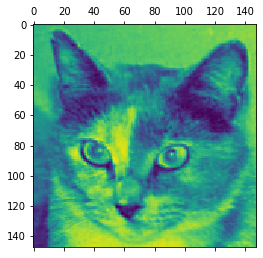

In [27]:
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]
first_layer_activation.shape
# visualizing
plt.matshow(first_layer_activation[0,:,:,7], cmap = 'viridis')



# import matplotlib.pyplot as plt
# plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')



/Users/syem/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/Users/syem/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


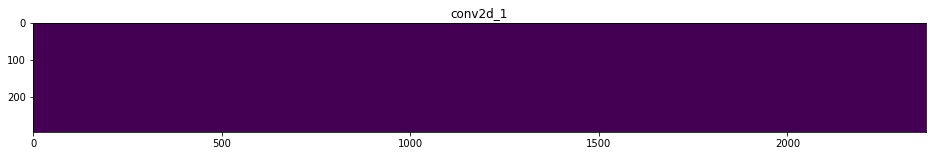

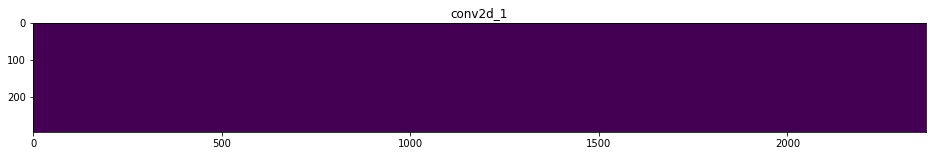

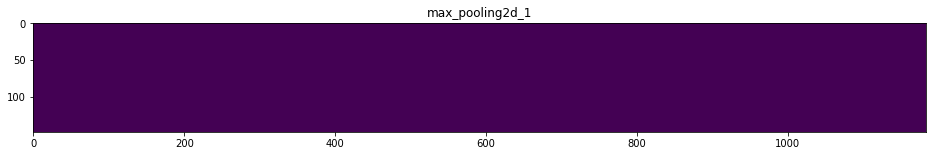

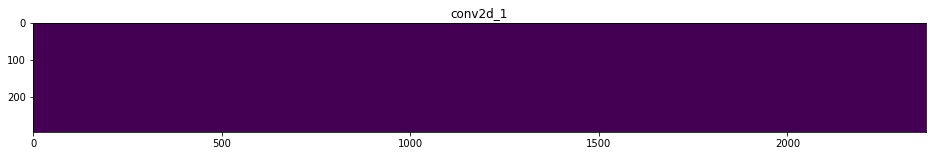

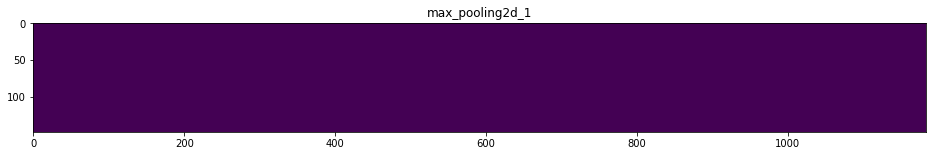

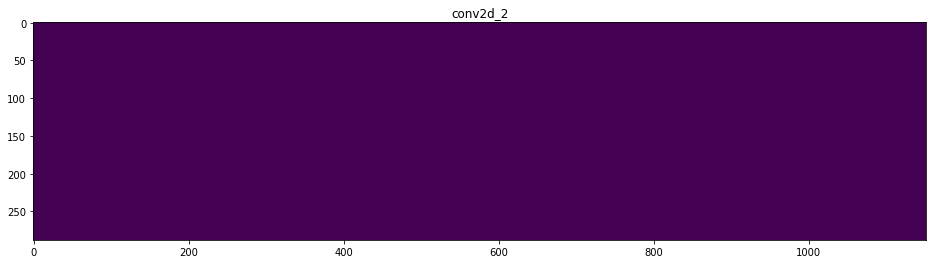

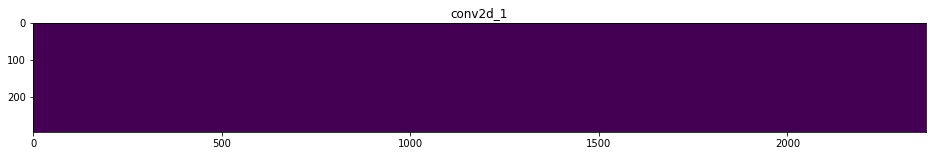

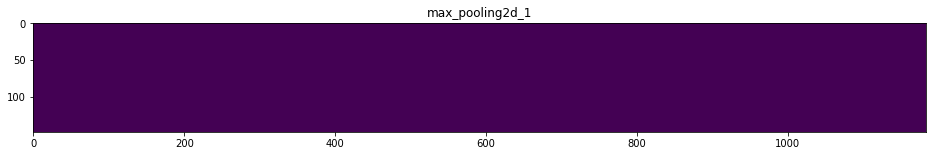

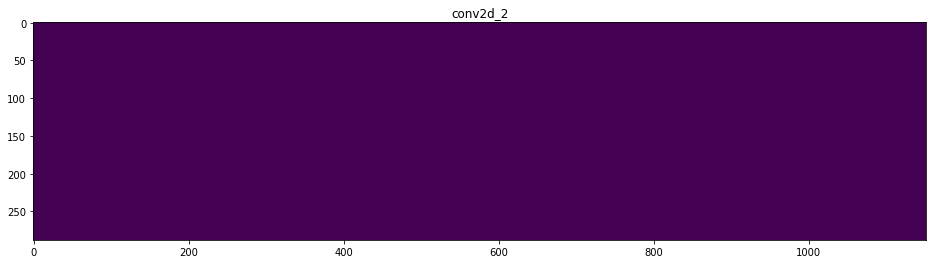

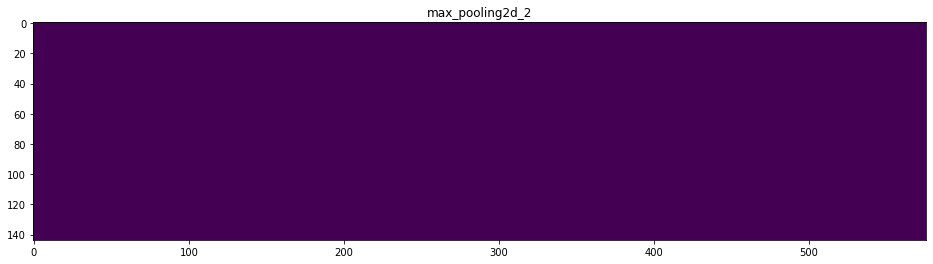

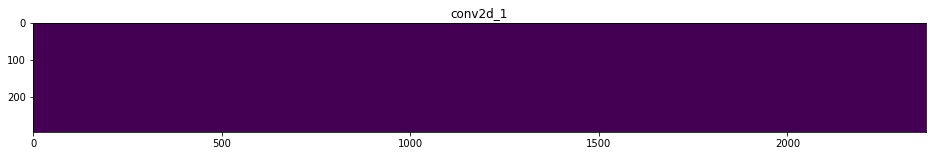

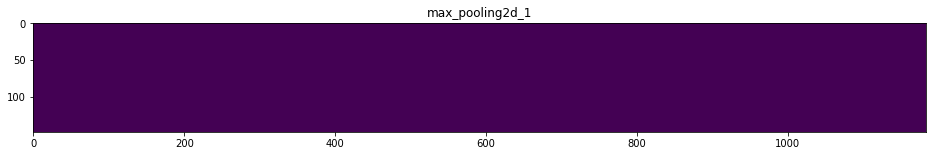

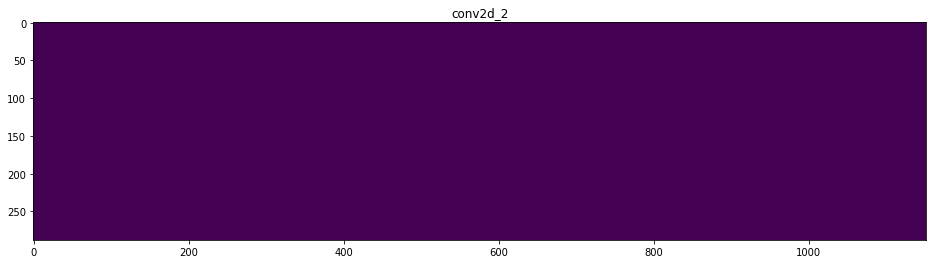

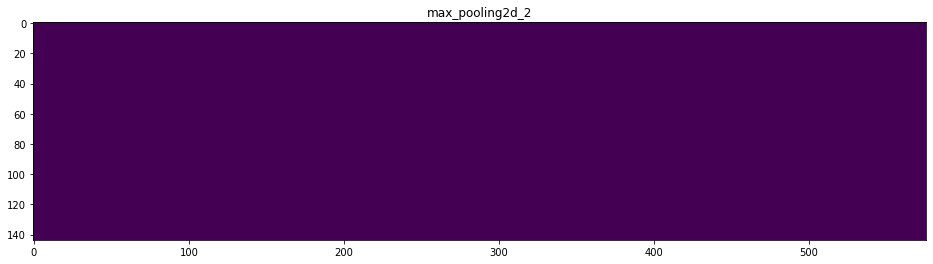

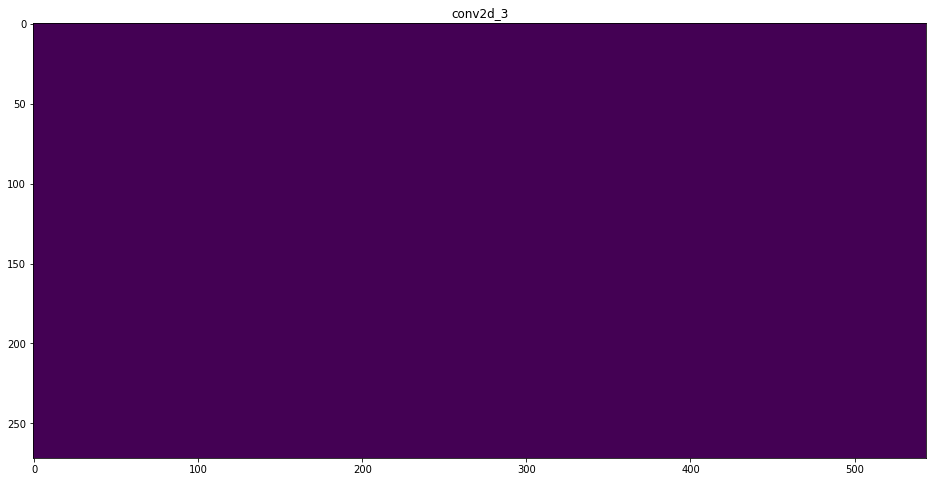

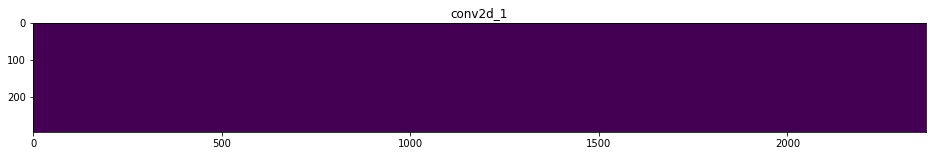

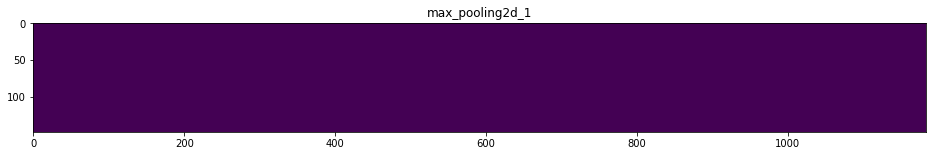

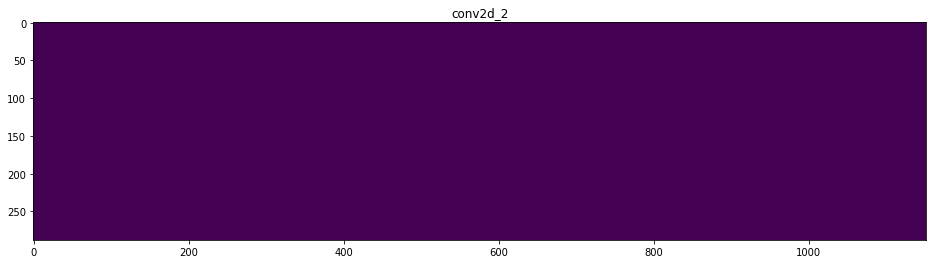

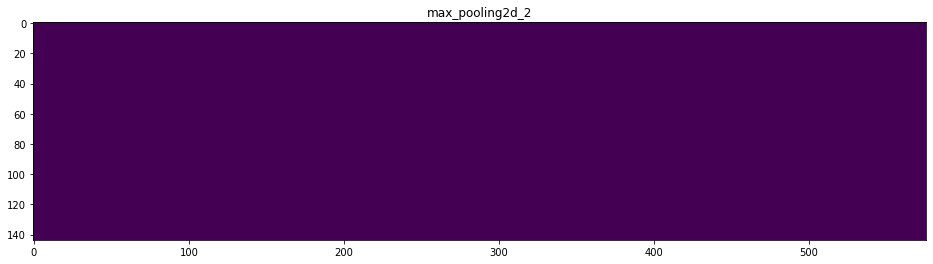

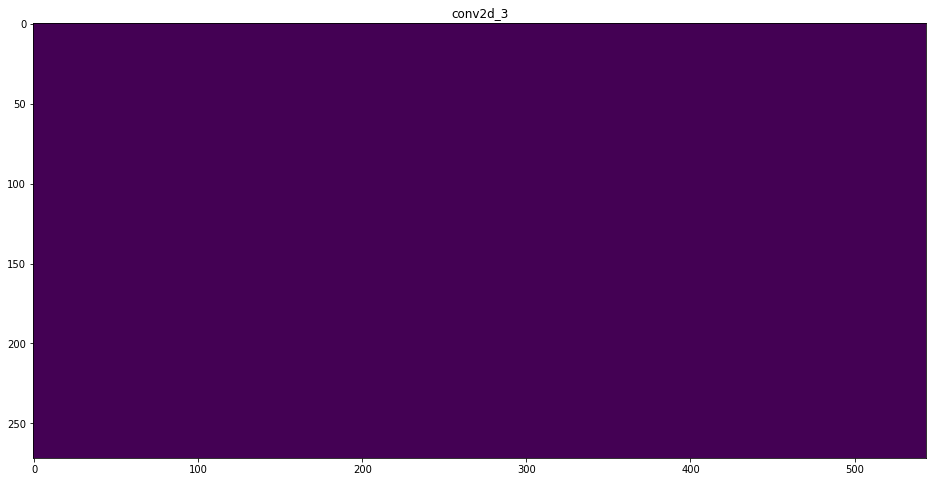

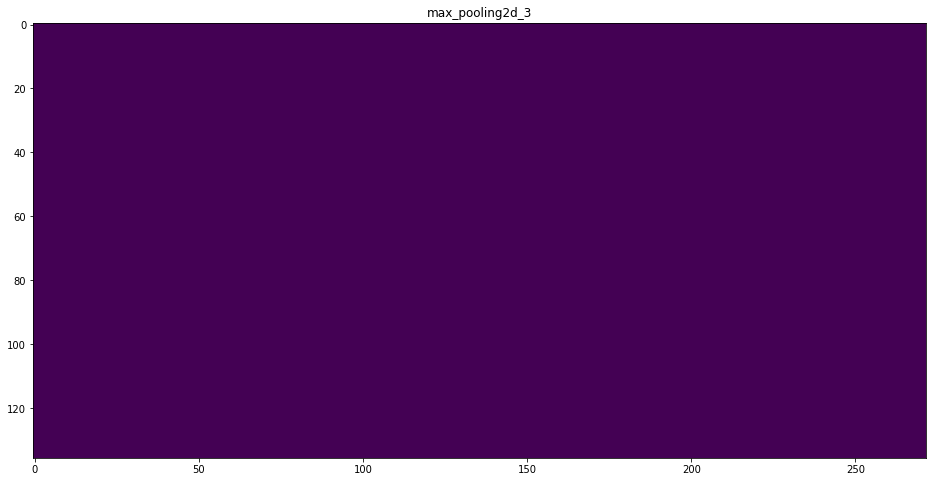

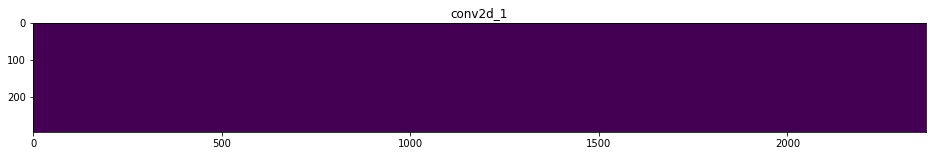

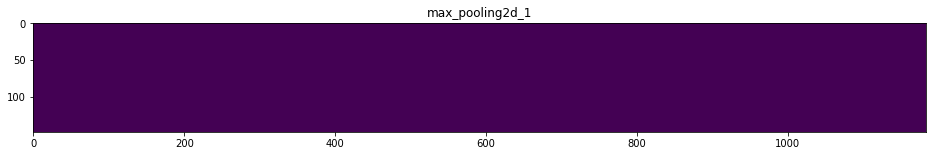

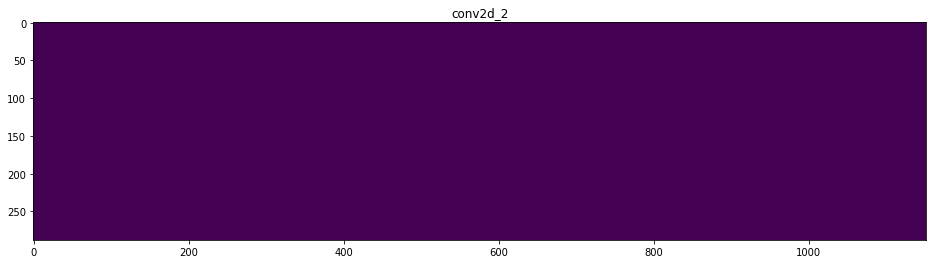

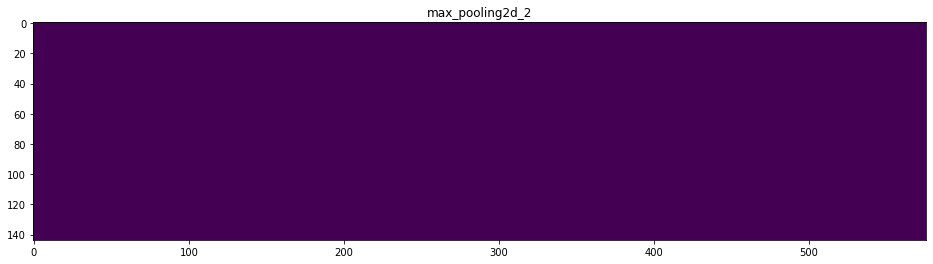

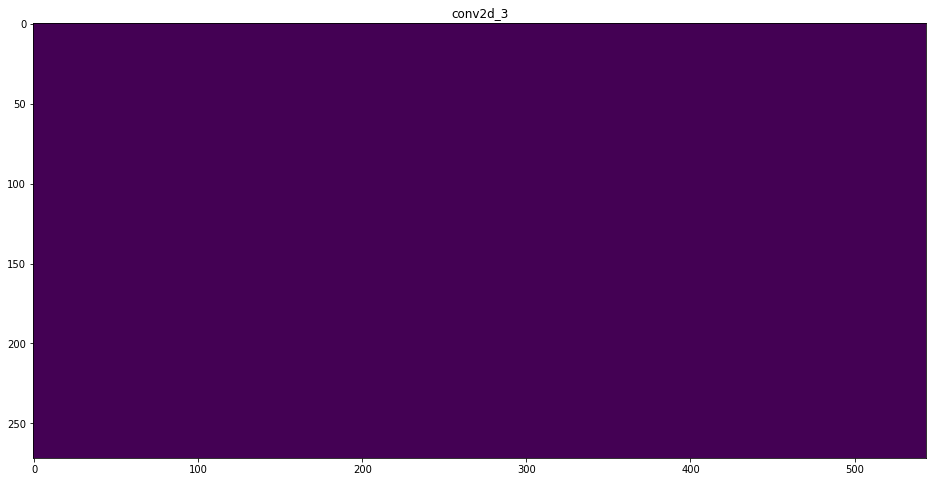

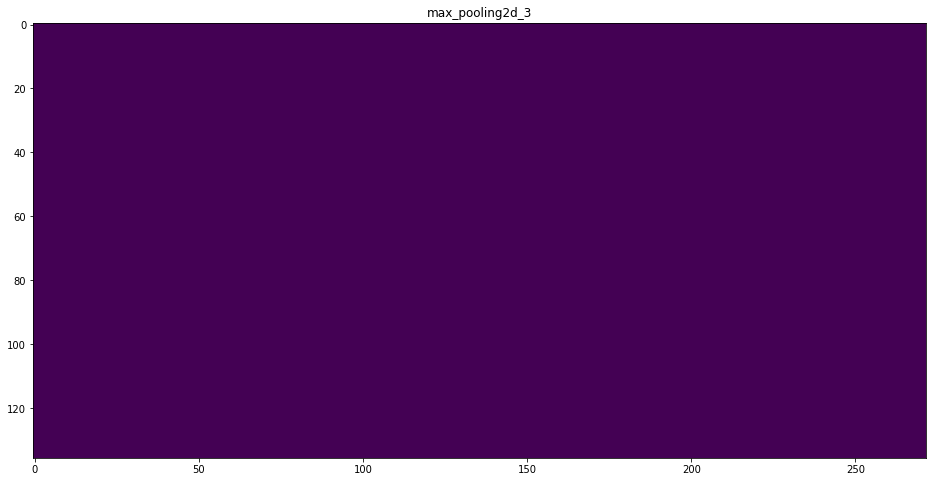

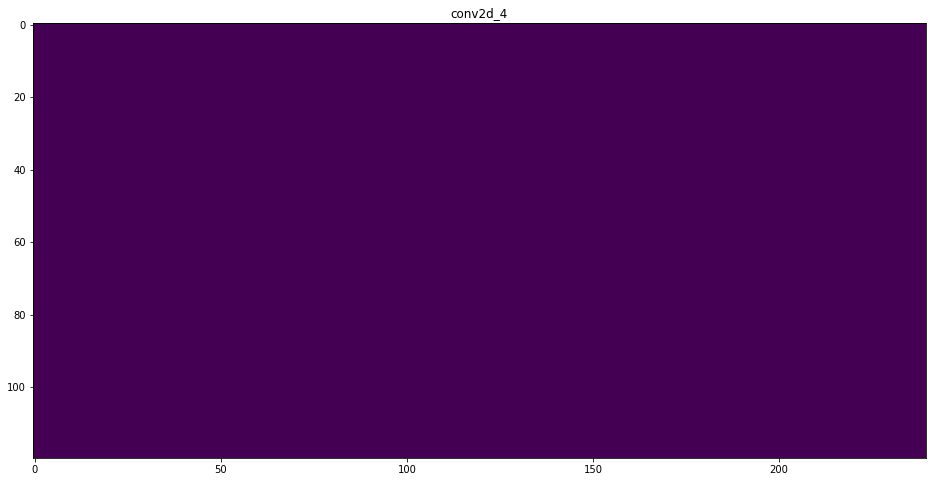

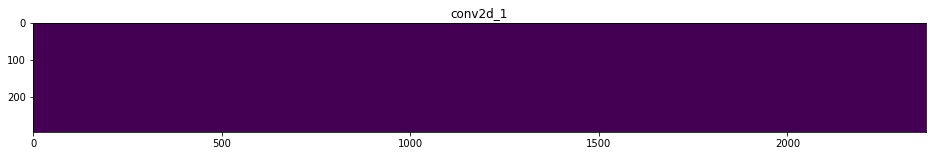

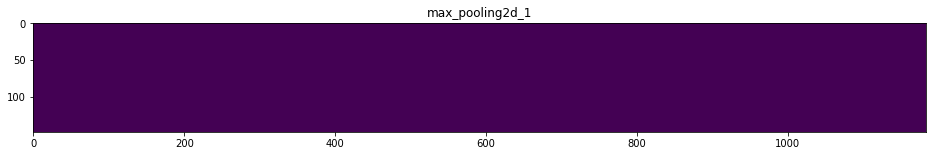

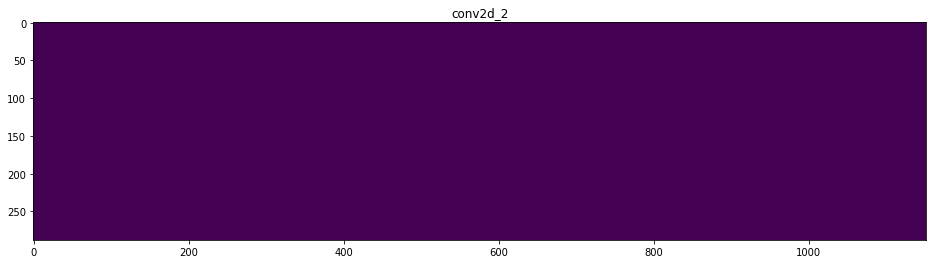

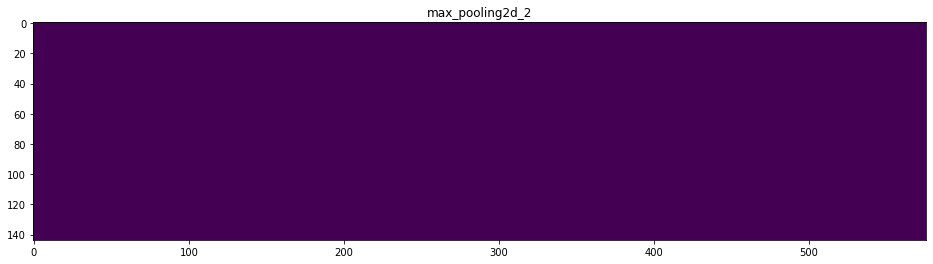

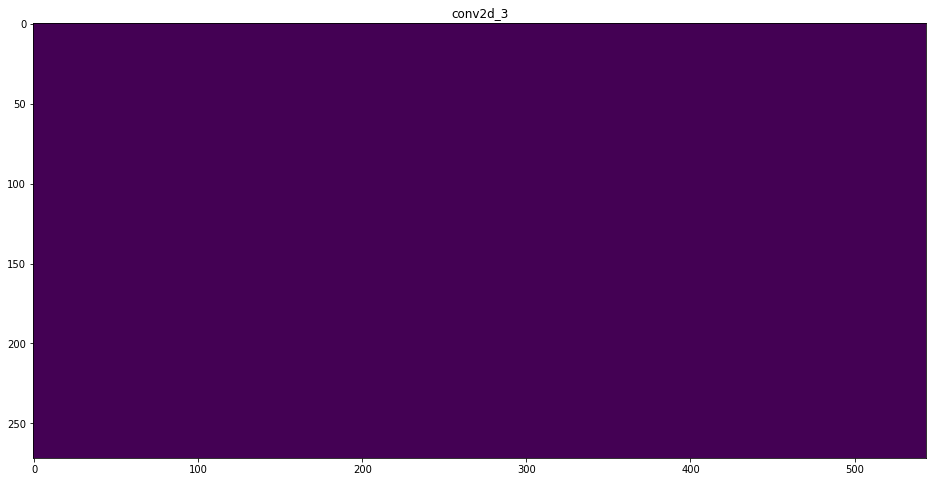

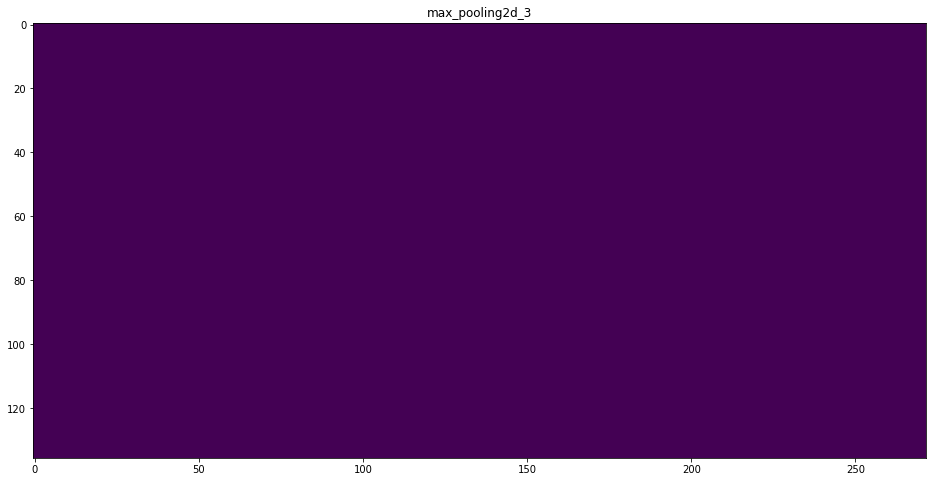

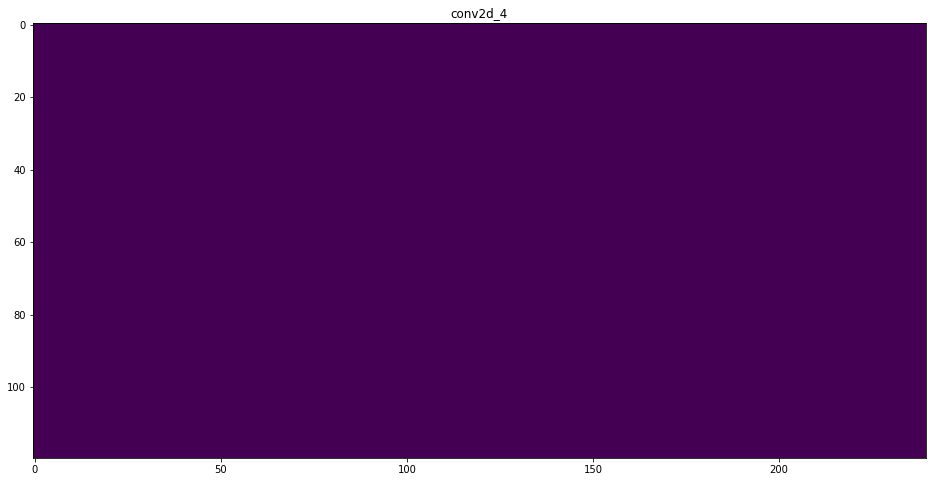

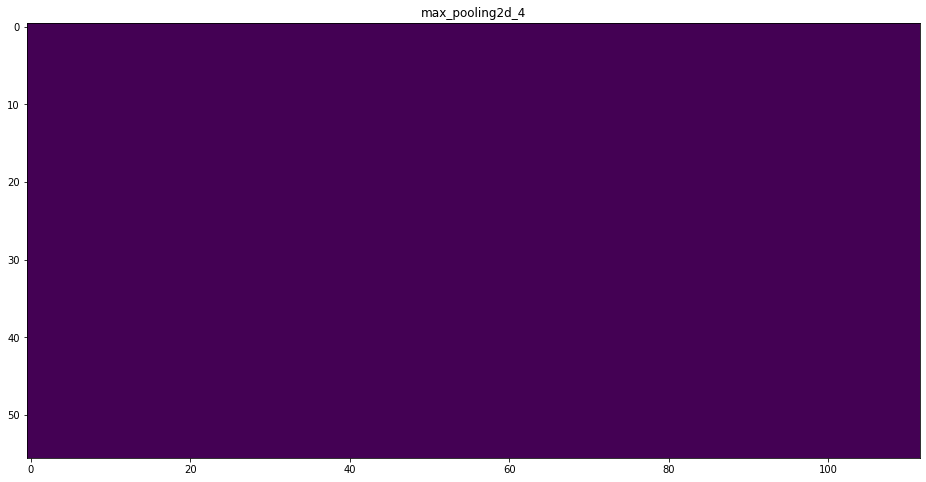

In [28]:
# Visualizing all 8 channels

layer_names = []

for layer in model.layers[:8]:
    layer_names.append(layer.name)
    images_per_row = 16
    for layer_name, layer_activation in zip(layer_names, activations):
        n_features = layer_activation.shape[-1] # number of features in feature map
        size = layer_activation.shape[1]   # size of feature map
        n_cols = n_features // images_per_row  # columns
        display_grid = np.zeros((size * n_cols, images_per_row * size))
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0, :, :, col * images_per_row + row]
                channel_image -= channel_image.mean() # process the image to make it better
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size]
        scale = 1./size
        plt.figure(figsize = (scale * display_grid.shape[1], scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')






In [29]:
# loss function for maximum filter activation 
from keras.applications import VGG16
from keras import backend as K

model = VGG16(weights = 'imagenet', include_top = False)
layer_name = 'block3_conv1'
filter_index = 0
layer_output = model.get_layer(layer_name).output # find specific layer and find output associated
loss = K.mean(layer_output[:, :, :, filter_index]) # best loss is mean

In [30]:
# find gradient associated with loss with respect to input
grads = K.gradients(loss, model.input)[0] # gradient included in K backend, Returns list of tensor(matrix), 1 in this 
                                          # case, the first element which is a tensor is kept
    
# normalize gradient

grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5) # 1e-5 avoids dividing by zero



In [31]:
# getting output given input
import numpy as np

iterate  = K.function([model.input], [loss, grads]) # special keras function which takes tensor of size 1 and returns 
                                                    # two tensors loss and gradient
loss_value, grads_vale = iterate([np.zeros((1, 150, 150, 3))]) 


# maximizing loss function using stochastic gradient descent
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128 # random samples
step = 1 # magnitude of gradient update
for i in range(40):   # runs gradient ascent for 40 steps
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * step  # step adjusts the input image in the direction which maximize loss
                                            # runs gradient ascent (maximize loss) for 40 steps

    
    
    

In [32]:
# convert floating tensor into a valid image

def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    x += 0.5
    x = np.clip(x, 0, 1) # clip to [0,1]
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8') # convert to RGB array
    
    return x


In [33]:
# Function for generate filter visulizations, Image represents pattern that maximized filter activations
# gradient ascent: apply gradient descent  to input image to display visual pattern which maximizes filter activation

def generate_pattern(layer_name, filter_index, size = 150):
    layer_output = model.get_layer(layer_name).output   # output layer
    loss = K.mean(layer_output[:, :, :, filter_index]) # loss function that maximizes the activation of the filter
    grads = K.gradients(loss, model.input)[0] # compute gradient with regard to loss, indicates which visual pattern activates filter
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5) # normalize gradient, reduce redundancy
    iterate = K.function([model.input], [loss, grads]) # returns loss and grads given input
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128 # starts from a gray image with some noise
    step = 1 # steps start at 1, increments in the direction that maximizes filter activation
    
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])  # find loss value, gradient given input
        input_img_data += grads_value * step  # gradient ascent in the direction which maximizes filter activation
    
    img = input_img_data[0]
    return deprocess_image(img)  # convert img to RGB
    




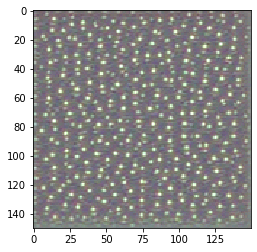

In [34]:
plt.imshow(generate_pattern('block3_conv1', 0)) # displays pattern that zeros channel of block3 responds maximally to

# filter 0 is seeming responsive to polka dot pattern

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


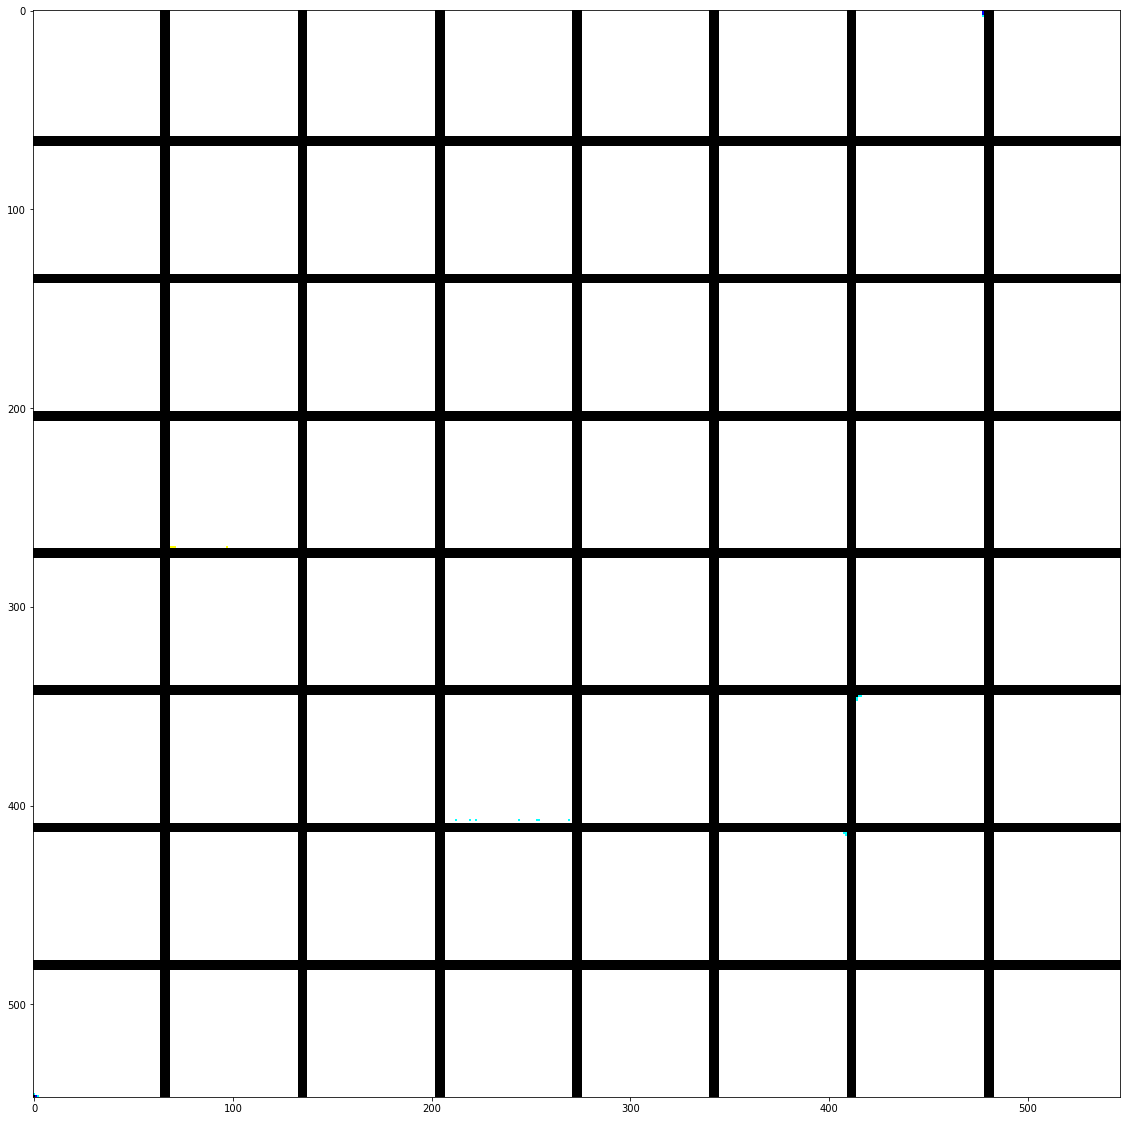

In [35]:
# generating a grid of all filter response in a layer

layer_name = 'block1_conv1'
size = 64
margin = 5
results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))  # empty black image to store results
for i in range(8):  # iterate over rows
    for j in range(8):  # iterate over column
        filter_img = generate_pattern(layer_name, i + (j * 8), size = size) # generate pattern which activates max filter
        horizontal_start = i * size + i * margin
        horizontal_end = horizontal_start + size
        vertical_start = j * size + j * margin
        vertical_end = vertical_start + size       
        results[horizontal_start: horizontal_end, vertical_start : vertical_end, :] = filter_img  # puts results in squrare results(i,j)

plt.figure(figsize = (20, 20))
plt.imshow(results)






In [36]:
# load model with pretrained weights
from keras.applications.vgg16 import VGG16
model = VGG16(weights = 'imagenet')

file = 'Downloads/elephant.jpg'


553467904/553467096 [==============================] - 281s 1us/step


AttributeError: 'str' object has no attribute 'shape'

In [49]:
from keras.applications.imagenet_utils import preprocess_input, decode_predictions


img = image.load_img(file, target_size = (224, 224)) # file path and resized to 224, 224
x = image.img_to_array(img)  # conver image to array

x = np.expand_dims(x, axis = 0) # shape expanded form (224, 224, 3) to (1, 224, 224, 3)
x = preprocess_input(x) # preprocess the batch, channel wise color normalization


In [50]:
preds = model.predict(x)
print('Predicted: ', decode_predictions(preds, top = 3)[0])  # 90% prob its a African probability, 86% tusker





40960/35363 [==================================] - 0s 1us/step
Predicted:  [('n02504458', 'African_elephant', 0.909421), ('n01871265', 'tusker', 0.086182885), ('n02504013', 'Indian_elephant', 0.0043545826)]
